In [22]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np

In [23]:
df_10 = pd.read_csv("Dataset/d10.csv")
df_20 = pd.read_csv("Dataset/d20.csv")
df_5 = pd.read_csv("Dataset/d5.csv")
df_15 = pd.read_csv("Dataset/d15.csv")
df_prb = pd.read_csv("Dataset/probe.csv")
print(df_10.head())
print(df_20.head())
print(df_prb.head())

     P    V
0   40  445
1   60  405
2   80  362
3  100  390
4  200  445
   P(Pa)  V(V)
0     40   397
1     60   384
2     80   417
3    100   473
4    200   603
   V_r(V)  V_l(mV)   I(mA)
0     -60     -3.3 -0.0033
1     -50     -2.7 -0.0027
2     -40     -2.0 -0.0020
3     -30     -1.2 -0.0012
4     -20      0.0  0.0000


In [24]:
#実験1定数定義
A = 11.3
B = 274
d1 = 0.01
d2 = 0.02
d3 = 0.015
d4 = 0.005

x_base = df_10["P"]
x1 = d1*x_base
x2 = d2*x_base
x3 = d3*x_base
x4 = d4*x_base

y_1 = df_10["V"]
y_2 = df_20["V(V)"]
y_3 = df_5["V(V)"]
y_4 = df_15["V(V)"]

def parameta(x, y, d):
    exp = np.exp(-1 * B * x* d / y) #dは[m]
    alpha = A * x * exp
    Phi = alpha * d
    ganmma = 1/ (np.exp(Phi) - 1)
    return Phi, ganmma

print("=========d10==============")
Phi_1, ganmma_1 = parameta(x_base, y_1, d1)
print(Phi_1, ganmma_1)
print("=========d20===============")
Phi_2, ganmma_2 = parameta(x_base, y_2, d2)
print(Phi_1, ganmma_2)
print("=========d5===============")
Phi_3, ganmma_3 = parameta(x_base, y_3, d3)
print(Phi_3, ganmma_3)
print("=========d15===============")
Phi_4, ganmma_4 = parameta(x_base, y_4, d4)
print(Phi_4, ganmma_4)

=========d10==============
0    3.533256
1    4.517918
2    4.933923
3    5.597044
4    6.596170
dtype: float64 0    0.030089
1    0.011032
2    0.007250
3    0.003723
4    0.001367
dtype: float64
=========d20===============
0    3.533256
1    4.517918
2    4.933923
3    5.597044
4    6.596170
dtype: float64 0    0.005522
1    0.003162
2    0.001806
3    0.000830
4    0.000649
dtype: float64
=========d5===============
0    5.003289
1    5.692827
2    5.785246
3    5.581497
4    5.456177
dtype: float64 0    0.006761
1    0.003381
2    0.003082
3    0.003781
4    0.004288
dtype: float64
=========d15===============
0    1.980435
1    2.701367
2    3.384919
3    4.008019
4    6.596191
dtype: float64 0    0.160105
1    0.071942
2    0.035069
3    0.018506
4    0.001367
dtype: float64


In [25]:
ganmma_ave = (np.mean(ganmma_1) + np.mean(ganmma_2) + np.mean(ganmma_3) + np.mean(ganmma_4)) / 4
print(ganmma_ave)

0.01868563421534873


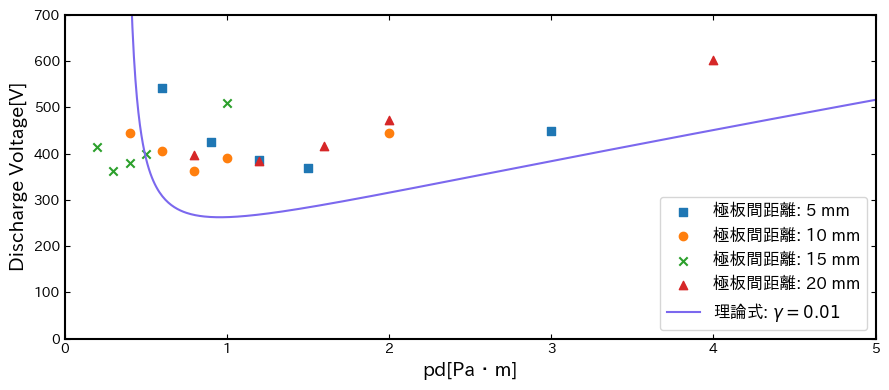

In [29]:
#実験１のグラフ作成
Pd = np.linspace(0.39, 5, 500)
V = B*Pd / np.log(A*Pd / np.log(1 + 1/0.019))

line_width = 1.5

fig, ax = plt.subplots(figsize=(9, 4))
ax.scatter(x3, y_3, marker="s", label="極板間距離: 5 mm")
ax.scatter(x1, y_1, marker="o", label="極板間距離: 10 mm")
ax.scatter(x4, y_4, marker="x", label="極板間距離: 15 mm")
ax.scatter(x2, y_2, marker="^", label="極板間距離: 20 mm")
ax.plot(Pd, V, color="mediumslateblue", label=f"理論式: $\gamma = 0.01$")
ax.set_xlabel("pd[Pa・m]", fontsize=14)
ax.set_ylabel("Discharge Voltage[V]", fontsize=14)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=False, direction='in')
ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=False, direction='in')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)
ax.set_ylim(0, 700)
ax.set_xlim(0, 5)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig("Pictures/A5-2-1.png")
plt.show()

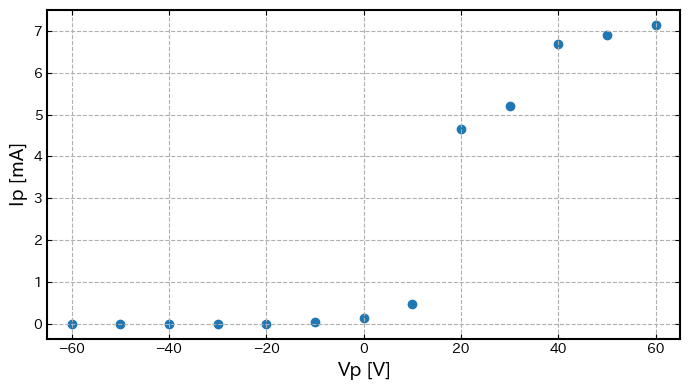

In [60]:
#実験2のグラフ作成
fig, ax = plt.subplots(figsize=(7, 4))
V_p= df_prb["V_r(V)"]
I_p = df_prb["I(mA)"]
ax.scatter(V_p, I_p, marker="o")
ax.set_xlabel("Vp [V]", fontsize=14)
ax.set_ylabel("Ip [mA]", fontsize=14)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=False, direction='in')
ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=False, direction='in')
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_xlim(-65, 65)
#plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.grid(linestyle="--")
plt.savefig("Pictures/A5-2-2.png")
plt.show()

In [68]:
#実験2: 定数定義
from scipy.constants import e, k, m_e
P_jikken2 = 40 #Pa
S = np.pi * 3.8**2 #cm^2
print("面積S: ", S)
print("e: ", e)
print("k_b: ", k)
print("m_e: ", m_e)

面積S:  45.36459791783661
e:  1.602176634e-19
k_b:  1.380649e-23
m_e:  9.1093837139e-31


In [96]:
from scipy.optimize import curve_fit
#電流の設定
I_p = I_p*1e-3
I_i = np.min(I_p)
I_e = (I_p - I_i)

#線形近似
mask = (V_p >= 0)  & (V_p <= 20)
V_fit = V_p[mask]
Ie_fit = I_e[mask]
ln_Ie = np.log(Ie_fit)

def linear(x, a, b):
    return a * x + b

popt, _ = curve_fit(linear, V_fit, ln_Ie)
a, b = popt

#Te
Te = 1 / a

Vs = 20

#ne
Ie_sat = 0.00466 - I_i
ne = Ie_sat / (e * S * np.sqrt(k * Te / (2 * np.pi * m_e)))

print(f"イオン電流 Ii = {I_i:.6f} A")
print(f"飽和電流 Ie_sat = {Ie_sat:.5f} A")
print(f"電子温度 Te = {Te:.3f} eV")
print(f"プラズマ電位 Vs = {Vs:.3f}V")
print(f"電子密度 ne = {ne:.3e} m^-3")
print(a)

イオン電流 Ii = -0.000000 A
飽和電流 Ie_sat = 0.00466 A
電子温度 Te = 5.650 eV
プラズマ電位 Vs = 20.000V
電子密度 ne = 1.737e+11 m^-3
0.17699920479131626


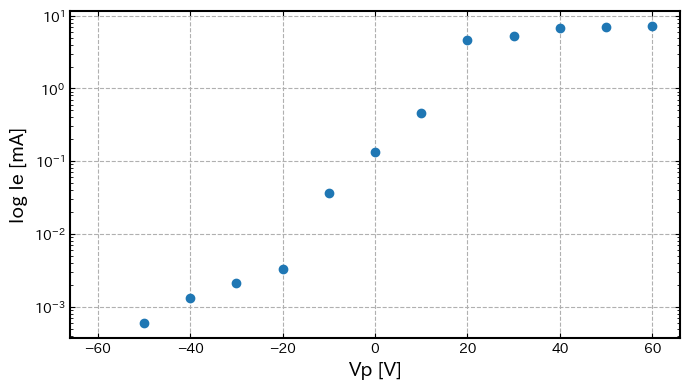

In [97]:
fig, ax = plt.subplots(figsize=(7, 4))
I_p = df_prb["I(mA)"]
I_i = np.min(I_p)
I_e = (I_p - I_i)
ax.semilogy(V_p, I_e, 'o')
#plt.semilogy(V_fit, np.exp(linear(V_fit, *popt)), '-')
#plt.axvline(Vs, color='r', linestyle='--')
ax.set_xlabel("Vp [V]", fontsize=14)
ax.set_ylabel("log Ie [mA]", fontsize=14)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=False, direction='in')
ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=False, direction='in')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)
#plt.legend(fontsize=12)
plt.grid(linestyle="--")
plt.tight_layout()
plt.savefig("Pictures/A5-2-3.png")
plt.show()